# Project 3
### Stephen Phillips

In [417]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from nltk.corpus import names
import random
import nltk
from collections import Counter
nltk.download("names")

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Steve\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


True

In [418]:
random.seed(5607)
male = [(name,"male") for name in names.words("male.txt")]
female = [(name, "female") for name in names.words("female.txt")]
names = male + female
random.shuffle(names)

## Visualizations:

In [419]:
names_df = pd.DataFrame(names)
names_df.columns = ["name","gender"]

In [420]:
names_df

,name,gender
0,Marie,female
1,Meggie,female
2,Eileen,female
3,Kerri,female
4,Rhona,female
...,...,...
7939,Beret,female
7940,Opalina,female
7941,Wilt,male
7942,Rebekah,female


we have more female names than male names

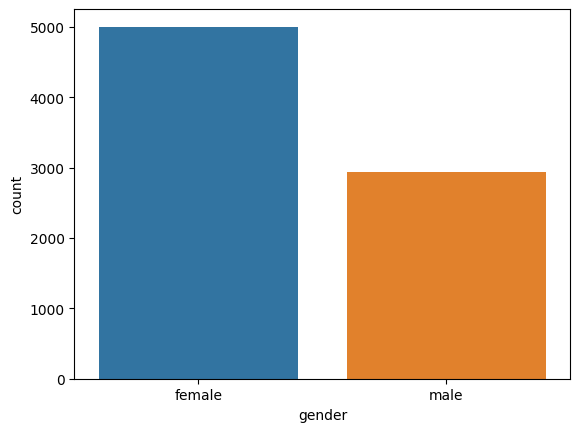

In [421]:
sns.countplot(data = names_df, x = "gender", hue= "gender")
plt.show()

Next we can separate the letters in each name and get a count of them as well as the gender they belong to

In [422]:
def count_letters(word):
    return Counter(word.lower())

In [423]:
total_count = Counter()
male_counts = names_df[names_df["gender"] == "male"].name.apply(count_letters)
female_counts = names_df[names_df["gender"] == "female"].name.apply(count_letters)

In [424]:
total_male_counts = Counter()
total_female_counts = Counter()

for count in male_counts:
    total_male_counts.update(count)

for count in female_counts:
    total_female_counts.update(count)

male_counts_df = pd.DataFrame(dict(total_male_counts).items(), columns= ["letter", "count"]).sort_values(by = "count", ascending= False)
male_counts_df["gender"] = "male"
total_letters = male_counts_df["count"].sum()
male_counts_df["normalized_count"] = male_counts_df["count"].apply(lambda x: x / total_letters)

female_counts_df = pd.DataFrame(dict(total_female_counts).items(), columns = ["letter", "count"]).sort_values(by ="count", ascending  = False)
female_counts_df["gender"] = "female"
total_letters = female_counts_df["count"].sum()
female_counts_df["normalized_count"] = female_counts_df["count"].apply(lambda x : x / total_letters)

counts_df = pd.concat([male_counts_df, female_counts_df])

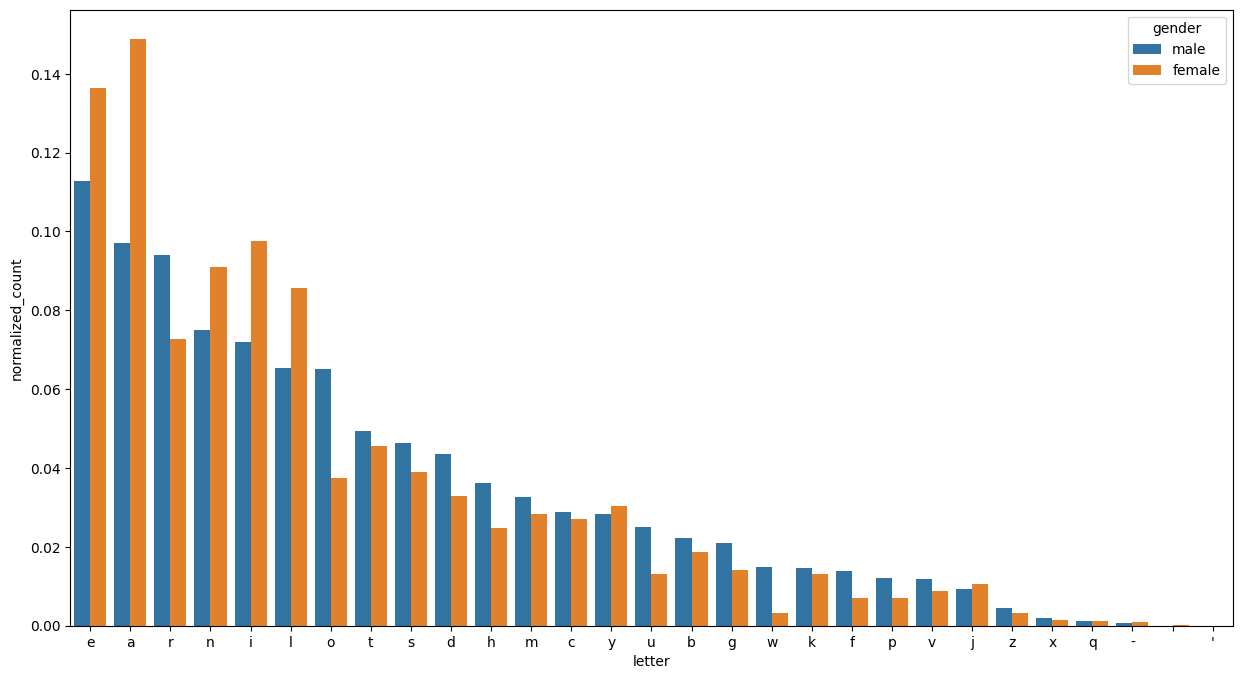

In [425]:
plt.figure(figsize =(15,8))
sns.barplot(data = counts_df, x = "letter", y = "normalized_count", hue = "gender")

plt.show()

Letters such as e, a, n, i and l are more common in female names while the letters r and o are more common in males

## Now we can visualize the length of words to determine if male or female names are longer

The average male name is 5.895344886170574 letters long
The median male name is 6.0 letters long


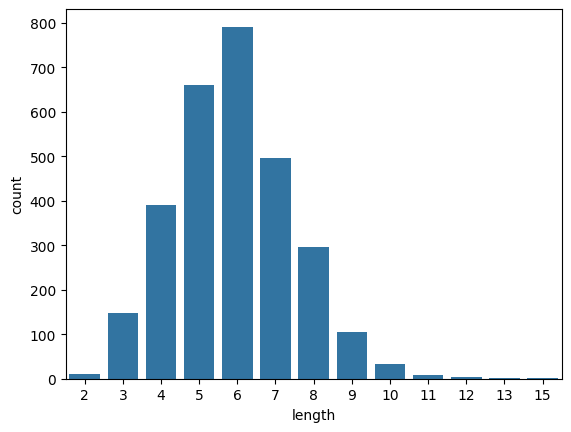

In [426]:
names_df["length"] = names_df["name"].apply(len)

sns.countplot(data = names_df[names_df["gender"] == "male"], x = "length")

print("The average male name is", names_df[names_df["gender"] == "male"].length.mean(), "letters long")
print("The median male name is", names_df[names_df["gender"] == "male"].length.median(), "letters long")

The average female name is 6.113777244551089 letters long
The median female name is 6.0 letters long


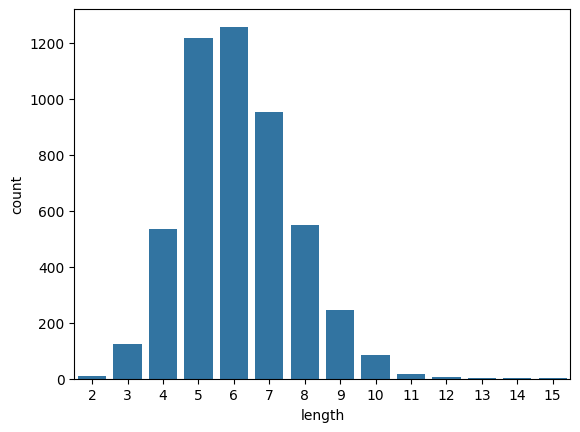

In [427]:
names_df["length"] = names_df["name"].apply(len)

sns.countplot(data = names_df[names_df["gender"] == "female"], x = "length")

print("The average female name is", names_df[names_df["gender"] == "female"].length.mean(), "letters long")
print("The median female name is", names_df[names_df["gender"] == "female"].length.median(), "letters long")

The length of women's names are longer on average

## Create Train/Test Sets:

In [428]:
test, dev_test, train = names[:500], names[500:1000], names[1000:]

We will start with the example model from the text book to train our model

In [429]:
def gender_features(word):
    return{"last_letter": word[-1]}


Using the gender features function we can train a model based on the final letter of the name

## Train Example Model to Start:

In [430]:
data_list = [train, dev_test, test]
train_example = [(gender_features(n),g) for (n,g) in train]
dev_test_example = [(gender_features(n),g) for (n,g) in dev_test]
test_example = [(gender_features(n),g) for (n,g) in test]
classifier = nltk.NaiveBayesClassifier.train(train_example)

In [431]:
print(nltk.classify.accuracy(classifier, dev_test_example))

0.774


Our beginner model has about a 77% accuracy in predicting the gender of a name, by only using the last letter of the name

In [432]:
classifier.show_most_informative_features(10)

Most Informative Features
             last_letter = 'a'            female : male   =     31.3 : 1.0
             last_letter = 'k'              male : female =     27.6 : 1.0
             last_letter = 'f'              male : female =     13.1 : 1.0
             last_letter = 'm'              male : female =     11.8 : 1.0
             last_letter = 'p'              male : female =     11.8 : 1.0
             last_letter = 'd'              male : female =      9.2 : 1.0
             last_letter = 'o'              male : female =      8.5 : 1.0
             last_letter = 'v'              male : female =      7.1 : 1.0
             last_letter = 'r'              male : female =      6.4 : 1.0
             last_letter = 'w'              male : female =      5.4 : 1.0


Most female names that end in 'a' are female names while most names that end in 'k' and 'f' are male names. We can now modify our model to include the last two letters of the name

In [433]:
def gender_features(word):
    return{"first_letter": word[-2],"second_letter": word[-1]}

In [434]:
train_2 = [(gender_features(n), g) for (n,g) in train]
dev_test_2 = [(gender_features(n), g) for (n,g) in dev_test]
classifier = nltk.NaiveBayesClassifier.train(train_2)
print(nltk.classify.accuracy(classifier, dev_test_2))

0.78


Adding a second letter to our model has slightly increased the accuracy

In [435]:
print(classifier.show_most_informative_features(10))

Most Informative Features
           second_letter = 'a'            female : male   =     31.3 : 1.0
           second_letter = 'k'              male : female =     27.6 : 1.0
           second_letter = 'f'              male : female =     13.1 : 1.0
           second_letter = 'm'              male : female =     11.8 : 1.0
           second_letter = 'p'              male : female =     11.8 : 1.0
           second_letter = 'd'              male : female =      9.2 : 1.0
           second_letter = 'o'              male : female =      8.5 : 1.0
            first_letter = 'o'              male : female =      7.6 : 1.0
           second_letter = 'v'              male : female =      7.1 : 1.0
           second_letter = 'r'              male : female =      6.4 : 1.0
None


The second letter 'a' is the most informative feature of our model, and this letter normally means a female name. The next most important letters are 'k' and 'f'. These all both used to determine that a name is male.

Now we can see if adding the starting letter of a name increases the model accuracy further

In [436]:
def gender_features(word):
    return{"first_letter":word[0],"second_to_last_letter": word[-2],"last_letter": word[-1]}

In [437]:
train_3 = [(gender_features(n), g) for (n,g) in train]
dev_test_3 = [(gender_features(n), g) for (n,g) in dev_test]
classifier = nltk.NaiveBayesClassifier.train(train_3)
print(nltk.classify.accuracy(classifier, dev_test_3))

0.808


Including the first letter in the name increases the model accuracy to about 80%

In [438]:
print(classifier.show_most_informative_features(10))

Most Informative Features
             last_letter = 'a'            female : male   =     31.3 : 1.0
             last_letter = 'k'              male : female =     27.6 : 1.0
             last_letter = 'f'              male : female =     13.1 : 1.0
             last_letter = 'm'              male : female =     11.8 : 1.0
             last_letter = 'p'              male : female =     11.8 : 1.0
             last_letter = 'd'              male : female =      9.2 : 1.0
             last_letter = 'o'              male : female =      8.5 : 1.0
   second_to_last_letter = 'o'              male : female =      7.6 : 1.0
             last_letter = 'v'              male : female =      7.1 : 1.0
             last_letter = 'r'              male : female =      6.4 : 1.0
None


Although the new predictor increased the accuracy of our model, it doesn't appear in our top 10 most informative features. The most informative features are the same as our previous model

In [439]:
def gender_features(word):
    return{"first_letter":word[0],"second_letter":word[1],"second_to_last_letter": word[-2],"last_letter": word[-1]}

In [440]:
train_4 = [(gender_features(n), g) for (n,g) in train]
dev_test_4 = [(gender_features(n), g) for (n,g) in dev_test]
classifier = nltk.NaiveBayesClassifier.train(train_4)
print(nltk.classify.accuracy(classifier, dev_test_4))

0.81


Our model accuracy has increased slightly

In [441]:
print(classifier.show_most_informative_features(10))

Most Informative Features
             last_letter = 'a'            female : male   =     31.3 : 1.0
             last_letter = 'k'              male : female =     27.6 : 1.0
             last_letter = 'f'              male : female =     13.1 : 1.0
             last_letter = 'm'              male : female =     11.8 : 1.0
             last_letter = 'p'              male : female =     11.8 : 1.0
             last_letter = 'd'              male : female =      9.2 : 1.0
             last_letter = 'o'              male : female =      8.5 : 1.0
   second_to_last_letter = 'o'              male : female =      7.6 : 1.0
             last_letter = 'v'              male : female =      7.1 : 1.0
           second_letter = 'k'              male : female =      6.5 : 1.0
None


In [442]:
def gender_features(word):
    if len(word) > 5:
        length = "long"
    else:
        length = "short"
    return{"first_letter":word[0],"second_letter":word[1],"second_to_last_letter": word[-2],"last_letter": word[-1], "length": length}

In [443]:
train_5 = [(gender_features(n), g) for (n,g) in train]
dev_test_5 = [(gender_features(n), g) for (n,g) in dev_test]
classifier = nltk.NaiveBayesClassifier.train(train_5)
print(nltk.classify.accuracy(classifier, dev_test_5))

0.808


In [444]:
print(classifier.show_most_informative_features(10))

Most Informative Features
             last_letter = 'a'            female : male   =     31.3 : 1.0
             last_letter = 'k'              male : female =     27.6 : 1.0
             last_letter = 'f'              male : female =     13.1 : 1.0
             last_letter = 'm'              male : female =     11.8 : 1.0
             last_letter = 'p'              male : female =     11.8 : 1.0
             last_letter = 'd'              male : female =      9.2 : 1.0
             last_letter = 'o'              male : female =      8.5 : 1.0
   second_to_last_letter = 'o'              male : female =      7.6 : 1.0
             last_letter = 'v'              male : female =      7.1 : 1.0
           second_letter = 'k'              male : female =      6.5 : 1.0
None


Using the length of words as feature has had 0 impact on our model performance, it actually decreased the accuracy. Next we can try to use vowel/consonant counts as a means of determining gender

In [445]:
def gender_features(word):
    vowels = set("aeiouAEIOU")
    total_vowels = sum(word.count(vowel) for vowel in vowels)
    total_consonants = len(word) - total_vowels
    return{"first_letter":word[0],"second_letter":word[1],"second_to_last_letter": word[-2],"last_letter": word[-1],"vowels" : total_vowels, "consonants" : total_consonants}

In [446]:
train_6 = [(gender_features(n), g) for (n,g) in train]
dev_test_6 = [(gender_features(n), g) for (n,g) in dev_test]
classifier = nltk.NaiveBayesClassifier.train(train_6)
print(nltk.classify.accuracy(classifier, dev_test_6))

0.798


Adding vowel/consonant predictors to our data reduced the accuracy by quite a bit. This feature will be removed as well

In [447]:
print(classifier.show_most_informative_features(10))

Most Informative Features
             last_letter = 'a'            female : male   =     31.3 : 1.0
             last_letter = 'k'              male : female =     27.6 : 1.0
             last_letter = 'f'              male : female =     13.1 : 1.0
             last_letter = 'm'              male : female =     11.8 : 1.0
             last_letter = 'p'              male : female =     11.8 : 1.0
             last_letter = 'd'              male : female =      9.2 : 1.0
             last_letter = 'o'              male : female =      8.5 : 1.0
   second_to_last_letter = 'o'              male : female =      7.6 : 1.0
             last_letter = 'v'              male : female =      7.1 : 1.0
           second_letter = 'k'              male : female =      6.5 : 1.0
None


In [448]:
def gender_features(word):
    vowels = set("aeiouAEIOU")
    total_vowels = sum(word.count(vowel) for vowel in vowels)
    total_consonants = len(word) - total_vowels
    length = len(word)
    return{"first_letter":word[0],"second_letter":word[1],"second_to_last_letter": word[-2],"last_letter": word[-1],"vowels" : total_vowels, "consonants" : total_consonants, "length":length}

In [449]:
train_7 = [(gender_features(n), g) for (n,g) in train]
dev_test_7 = [(gender_features(n), g) for (n,g) in dev_test]
classifier = nltk.NaiveBayesClassifier.train(train_7)
print(nltk.classify.accuracy(classifier, dev_test_7))

0.788


In [450]:
print(classifier.show_most_informative_features(10))

Most Informative Features
             last_letter = 'a'            female : male   =     31.3 : 1.0
             last_letter = 'k'              male : female =     27.6 : 1.0
             last_letter = 'f'              male : female =     13.1 : 1.0
             last_letter = 'm'              male : female =     11.8 : 1.0
             last_letter = 'p'              male : female =     11.8 : 1.0
             last_letter = 'd'              male : female =      9.2 : 1.0
             last_letter = 'o'              male : female =      8.5 : 1.0
   second_to_last_letter = 'o'              male : female =      7.6 : 1.0
             last_letter = 'v'              male : female =      7.1 : 1.0
           second_letter = 'k'              male : female =      6.5 : 1.0
None


I did some research on the biggest tells for whether a name is male or female. I will try adding the third letter to see if this aids in decision making

In [451]:
def gender_features(word):
    vowels = set("aeiouAEIOU")
    total_vowels = sum(word.count(vowel) for vowel in vowels)
    total_consonants = len(word) - total_vowels
    length = len(word)
    if len(word) > 2:
        return{"first_letter":word[0],"second_letter":word[1],"third_to_last_letter":word[-3], "second_to_last_letter": word[-2],"last_letter": word[-1], "vowels": total_vowels}
    else:
        return{"first_letter":word[0],"second_letter":word[1], "second_to_last_letter": word[-2],"last_letter": word[-1], "vowels": total_vowels}

In [452]:
train_8 = [(gender_features(n), g) for (n,g) in train]
dev_test_8 = [(gender_features(n), g) for (n,g) in dev_test]
classifier = nltk.NaiveBayesClassifier.train(train_8)
print(nltk.classify.accuracy(classifier, dev_test_8))

0.818


In [453]:
print(classifier.show_most_informative_features(10))

Most Informative Features
             last_letter = 'a'            female : male   =     31.3 : 1.0
             last_letter = 'k'              male : female =     27.6 : 1.0
             last_letter = 'f'              male : female =     13.1 : 1.0
             last_letter = 'm'              male : female =     11.8 : 1.0
             last_letter = 'p'              male : female =     11.8 : 1.0
             last_letter = 'd'              male : female =      9.2 : 1.0
             last_letter = 'o'              male : female =      8.5 : 1.0
   second_to_last_letter = 'o'              male : female =      7.6 : 1.0
             last_letter = 'v'              male : female =      7.1 : 1.0
    third_to_last_letter = 'S'              male : female =      6.9 : 1.0
None


In [454]:
def gender_features(word):
    vowels = set("aeiouAEIOU")
    total_vowels = sum(word.count(vowel) for vowel in vowels)
    total_consonants = len(word) - total_vowels
    length = len(word)
    if len(word) > 2:
        return{"first_letter":word[0],"second_letter":word[1],"third_to_last_letter":word[-3], "second_to_last_letter": word[-2],"last_letter": word[-1], "vowels": total_vowels}
    else:
        return{"first_letter":word[0],"second_letter":word[1], "second_to_last_letter": word[-2],"last_letter": word[-1], "vowels": total_vowels}

In [457]:
errors = []
for (name, tag) in dev_test:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name) )

In [462]:
for (tag, guess, name) in sorted(errors):
    print("tag:",str(tag),"guess:", guess, "name:", name)


tag: female guess: male name: Allis
tag: female guess: male name: Babs
tag: female guess: male name: Bliss
tag: female guess: male name: Cameo
tag: female guess: male name: Charlott
tag: female guess: male name: Chloe
tag: female guess: male name: Corey
tag: female guess: male name: Cristal
tag: female guess: male name: Cristen
tag: female guess: male name: Deb
tag: female guess: male name: Devin
tag: female guess: male name: Dyan
tag: female guess: male name: Dynah
tag: female guess: male name: Fiann
tag: female guess: male name: Gail
tag: female guess: male name: Gillan
tag: female guess: male name: Gretel
tag: female guess: male name: Grier
tag: female guess: male name: Hayley
tag: female guess: male name: Heather
tag: female guess: male name: Holley
tag: female guess: male name: Ivory
tag: female guess: male name: Jazmin
tag: female guess: male name: Jenifer
tag: female guess: male name: Kay
tag: female guess: male name: Kimmy
tag: female guess: male name: Koo
tag: female guess: ma

Here is a readout of the names that were incorrectly guessed by the model. Although we have this data, it is difficult to derive another rule to help the model guess these names correctly. We will use the model as is

In [455]:
test_8 = [(gender_features(n), g) for (n,g) in test]
print(nltk.classify.accuracy(classifier, test_8))

0.806


The accuracy of our model is about 1% less than the dev test model